# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import logictensornetworks as ltn
import tensorflow as tf
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

# Dataset exploration

In [2]:
start_time = time.time()
df = pd.read_csv("/Users/eduard.hogea/Documents/Facultate/Internship/explorare/KNN99---LTN/datesets/KDD99/kddcup99.csv", skipinitialspace = True)

In [3]:
df.shape #numar de linii si coloane

(494020, 42)

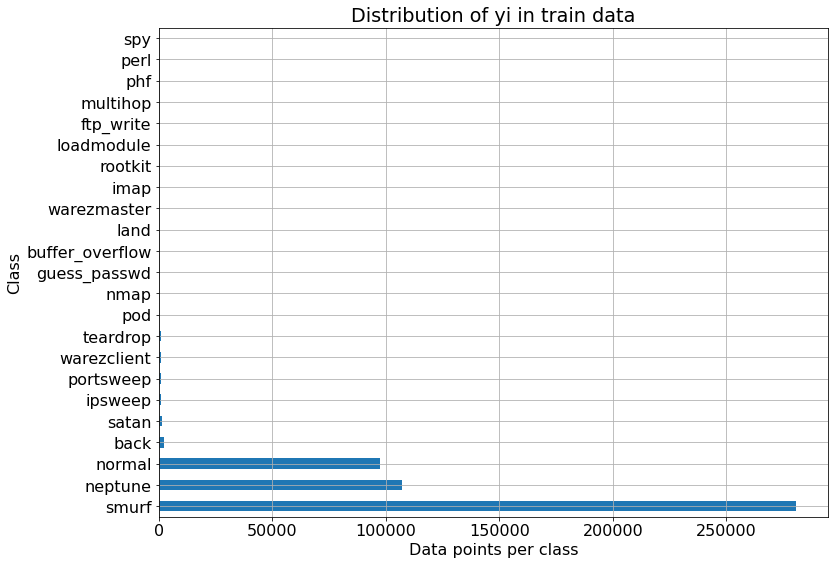

In [4]:
plt.figure(figsize=(12,9))
plt.rcParams.update({'font.size': 16})
class_distribution = df['label'].value_counts()
class_distribution.plot(kind='barh')
plt.xlabel('Data points per class')
plt.ylabel('Class')
plt.title('Distribution of yi in train data')
plt.grid()
#plt.xlim([0, 100])
plt.show()

In [5]:
df.drop_duplicates(keep= 'first', inplace=True) #eliminarea dublurilor liniilor
print('Null values in dataset are',len(df[df.isnull().any(1)]))
df.shape

Null values in dataset are 0


(145585, 42)

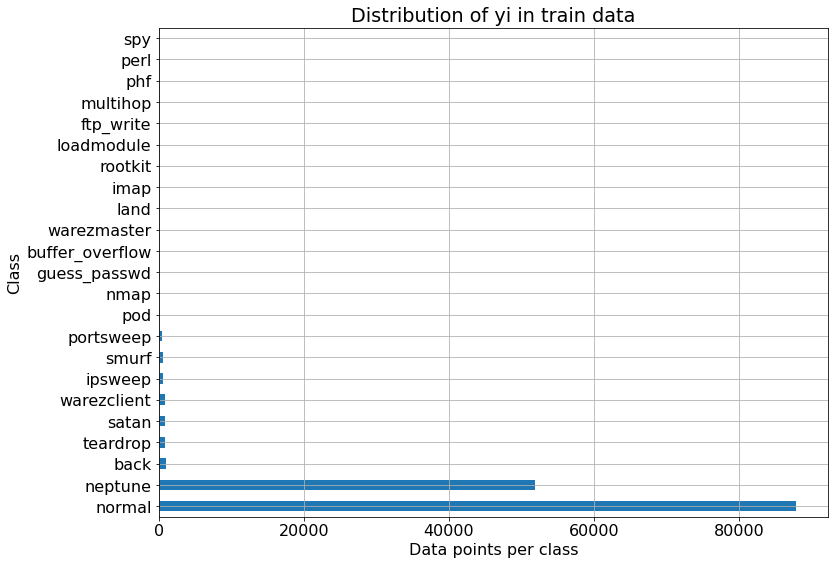

In [6]:
plt.figure(figsize=(12,9))
plt.rcParams.update({'font.size': 16})
class_distribution = df['label'].value_counts()
class_distribution.plot(kind='barh')
plt.xlabel('Data points per class')
plt.ylabel('Class')
plt.title('Distribution of yi in train data')
plt.grid()
#plt.xlim([0, 100])
plt.show()

In [7]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,145585.000000,1.455850e+05,1.455850e+05,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,...,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000
mean,132.026088,7.995752e+03,2.859788e+03,0.000137,0.020201,0.000048,0.100175,0.000515,0.491486,0.026177,...,181.469423,129.935570,0.553226,0.061389,0.092826,0.019048,0.291599,0.290980,0.110464,0.107676
std,1224.161209,1.820390e+06,6.081000e+04,0.011720,0.239369,0.010150,1.426803,0.028586,0.499929,3.311384,...,99.097396,114.714717,0.456236,0.147021,0.241124,0.060410,0.452493,0.453448,0.306098,0.304221
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,78.000000,12.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.470000e+02,1.050000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,117.000000,0.770000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.880000e+02,1.164000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.030000,0.020000,1.000000,1.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df = df.sample(frac=1) #shuffle

In [9]:
df.sample(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
365640,0,tcp,private,S0,0,0,0,0,0,0,...,2,0.01,0.06,0.00,0.00,1.0,1.0,0.0,0.00,neptune
476470,0,tcp,private,REJ,0,0,0,0,0,0,...,2,0.01,0.06,0.00,0.00,0.0,0.0,1.0,1.00,neptune
393738,0,tcp,private,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.0,1.0,0.0,0.00,neptune
348956,0,tcp,ftp_data,SF,4316,0,0,0,0,0,...,63,0.25,0.03,0.24,0.00,0.0,0.0,0.0,0.00,normal
85772,0,tcp,http,SF,308,310,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,normal
24938,0,tcp,http,SF,288,292,0,0,0,0,...,255,1.00,0.00,0.00,0.01,0.0,0.0,0.0,0.00,normal
41241,0,tcp,http,REJ,0,0,0,0,0,0,...,124,1.00,0.00,0.11,0.27,0.0,0.0,1.0,0.99,normal
365776,0,tcp,uucp,S0,0,0,0,0,0,0,...,4,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.00,neptune
55946,0,tcp,private,S0,0,0,0,0,0,0,...,17,0.07,0.07,0.00,0.00,1.0,1.0,0.0,0.00,neptune
107424,0,tcp,http,SF,183,4832,0,0,0,0,...,20,1.00,0.00,0.06,0.10,0.0,0.0,0.0,0.00,normal


In [10]:
df.drop_duplicates(keep='first', inplace = True)
df.dropna(inplace=True,axis=1) 
print("Read {} rows.".format(len(df)))

Read 145585 rows.


In [11]:
# changing attack labels to their respective attack class
def change_label(df):
    df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
    df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail',
       'snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
    df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
    df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)
    
change_label(df)

In [12]:
counts = df.label.value_counts()
counts = counts.array

## Data normalization

# Categorical data One-hot encoding

In [18]:
# selecting categorical data attributes
cat_col = ['protocol_type','service','flag']

In [19]:
# creating a dataframe with only categorical attributes
categorical = df[cat_col]

In [20]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
categorical = pd.get_dummies(categorical,columns=cat_col)
categorical.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
11946,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
383042,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
360092,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12465,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
25476,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
#dropping categorical attributes
df.drop(["protocol_type"], axis = 1, inplace = True)
df.drop(["service"], axis = 1, inplace = True)
df.drop(["flag"], axis = 1, inplace = True)

#adding them back after encoding
# joining the selected attribute with the one-hot-encoded categorical dataframe
df = df.join(categorical)

In [22]:
# saving final dataset to disk
df.to_csv('df.csv')

In [23]:
df.shape

(145585, 119)

In [24]:
column_array = []
for c in df.columns: 
    column_array.append(c)

In [25]:
features = df[column_array]
features.drop('label', inplace = True, axis = 1)
label_label=df['label']
batch_size=1000

ds_train = tf.data.Dataset.from_tensor_slices((features[:110000],label_label[:110000])).batch(batch_size)
ds_test = tf.data.Dataset.from_tensor_slices((features[110000:],label_label[110000:])).batch(batch_size)

Metal device set to: Apple M1


2022-05-05 14:27:06.850088: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-05 14:27:06.850211: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


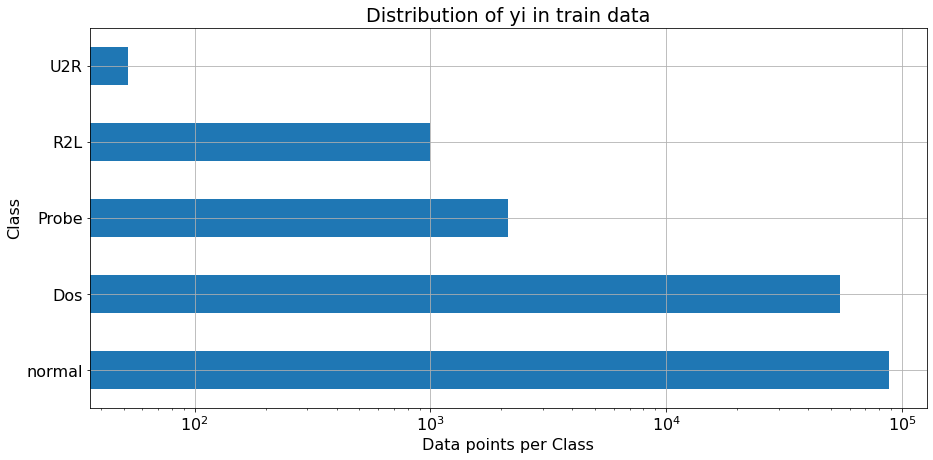

In [26]:
plt.figure(figsize=(15,7))
class_distribution = df['label'].value_counts()
class_distribution.plot(kind='barh')
plt.xlabel('Data points per Class')
plt.ylabel('Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.xscale('log')
plt.show()

# Creare model

### Predicate

| index | class | 
| --- | --- |
| 0 | normal |
| 1 | Dos |
| 2 | Probe |
| 3 | R2L |
| 4 | U2R |

In [27]:
class MLP(tf.keras.Model):
    """Model that returns logits."""
    def __init__(self, n_classes, hidden_layer_sizes=(16,16,8)):
        super(MLP, self).__init__()
        self.denses = [tf.keras.layers.Dense(s, activation="elu") for s in hidden_layer_sizes]
        self.dense_class = tf.keras.layers.Dense(n_classes)
        
    def call(self, inputs):
        x = inputs
        for dense in self.denses:
            x = dense(x)
        return self.dense_class(x)

logits_model = MLP(5)
p = ltn.Predicate(ltn.utils.LogitsToPredicateModel(logits_model,single_label=False))

In [28]:
class_normal = ltn.Constant(0, trainable=False)
class_Dos = ltn.Constant(1, trainable=False)
class_Probe = ltn.Constant(2, trainable=False)
class_R2L = ltn.Constant(3, trainable=False)
class_U2R = ltn.Constant(4, trainable=False)

# Logica si axiomele
```
forall x_normal: C(x_normal,normal): all the non-attacks should have label normal
forall x_Dos: C(x_Dos,Dos): all the Dos attacks should have label Dos
forall x_Probe: C(x_Probe,Probe): all the Probe attacks should have label Probe
forall x_R2L: C(x_R2L,R2L): all the R2L attacks should have label R2L
forall x_U2R: C(x_U2R,U2R): all the U2R attacks should have label U2R

forall x: ~(C(x,normal) & C(x,Dos)): if an example x is labelled as normal, it cannot be labelled as Dos too;
forall x: ~(C(x,normal) & C(x,Probe)): if an example x is labelled as normal, it cannot be labelled as Probe too;
forall x: ~(C(x,normal) & C(x,R2L)): if an example x is labelled as normal, it cannot be labelled as R2L too;
forall x: ~(C(x,normal) & C(x,U2R)): if an example x is labelled as normal, it cannot be labelled as U2R too;
forall x: ~(C(x,Dos) & C(x,Probe)): if an example x is labelled as Dos, it cannot be labelled as Probe too;
forall x: ~(C(x,Dos) & C(x,R2L)): if an example x is labelled as Dos, it cannot be labelled as R2L too;
forall x: ~(C(x,Dos) & C(x,U2R)): if an example x is labelled as Dos, it cannot be labelled as U2R too;
forall x: ~(C(x,Probe) & C(x,R2L)): if an example x is labelled as Probe, it cannot be labelled as R2L too;
forall x: ~(C(x,Probe) & C(x,U2R)): if an example x is labelled as Probe, it cannot be labelled as U2R too;
forall x: ~(C(x,R2L) & C(x,U2R)): if an example x is labelled as R2L, it cannot be labelled as U2R too;
```

In [29]:
Not = ltn.Wrapper_Connective(ltn.fuzzy_ops.Not_Std())
And = ltn.Wrapper_Connective(ltn.fuzzy_ops.And_Prod())
Or = ltn.Wrapper_Connective(ltn.fuzzy_ops.Or_ProbSum())
Implies = ltn.Wrapper_Connective(ltn.fuzzy_ops.Implies_Reichenbach())
Equiv = ltn.Wrapper_Connective(ltn.fuzzy_ops.Equiv(ltn.fuzzy_ops.And_Prod(),ltn.fuzzy_ops.Implies_Reichenbach()))
Forall = ltn.Wrapper_Quantifier(ltn.fuzzy_ops.Aggreg_pMeanError(p=4),semantics="forall")
Exists = ltn.Wrapper_Quantifier(ltn.fuzzy_ops.Aggreg_pMean(p=6),semantics="exists")

In [30]:
formula_aggregator = ltn.Wrapper_Formula_Aggregator(ltn.fuzzy_ops.Aggreg_pMeanError(p=4))

@tf.function
def axioms(features,label_label):
    x = ltn.Variable("x",features)
    x_normal = ltn.Variable("x_normal",features[label_label=="normal"])
    x_Dos = ltn.Variable("x_Dos",features[label_label=="Dos"])
    x_Probe = ltn.Variable("x_Probe",features[label_label=="Probe"])
    x_R2L = ltn.Variable("x_R2L",features[label_label=="R2L"])
    x_U2R = ltn.Variable("x_U2R",features[label_label=="U2R"])
    
    
    axioms = [
        Forall(x_normal, p([x_normal,class_normal])),
        Forall(x_Dos, p([x_Dos,class_Dos])),
        Forall(x_Probe, p([x_Probe,class_Probe])),
        Forall(x_R2L, p([x_R2L,class_R2L])),
        Forall(x_U2R, p([x_U2R,class_U2R])),
            
        Forall(x,Not(And(p([x,class_normal]),p([x,class_Dos])))),
        Forall(x,Not(And(p([x,class_normal]),p([x,class_Probe])))),
        Forall(x,Not(And(p([x,class_normal]),p([x,class_R2L])))),
        Forall(x,Not(And(p([x,class_normal]),p([x,class_U2R])))),
        Forall(x,Not(And(p([x,class_Dos]),p([x,class_Probe])))),
        Forall(x,Not(And(p([x,class_Dos]),p([x,class_R2L])))),
        Forall(x,Not(And(p([x,class_Dos]),p([x,class_U2R])))),
        Forall(x,Not(And(p([x,class_Probe]),p([x,class_R2L])))),
        Forall(x,Not(And(p([x,class_Probe]),p([x,class_U2R])))),
        
        
    ]
    sat_level = formula_aggregator(axioms).tensor
    return sat_level

In [31]:
for features, label_label in ds_train:
    print("Initial sat level %.5f"%axioms(features, label_label))
    break

2022-05-05 14:27:09.655428: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-05 14:27:09.655923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Initial sat level 0.54725


# Training

In [32]:
metrics_dict = {
    'train_sat_kb': tf.keras.metrics.Mean(name='train_sat_kb'),
    'test_sat_kb': tf.keras.metrics.Mean(name='test_sat_kb'),
    'train_accuracy': tf.keras.metrics.Mean(name="train_accuracy"),
    'test_accuracy': tf.keras.metrics.Mean(name="test_accuracy"),
    'test_sat_phi1': tf.keras.metrics.Mean(name='test_sat_phi1'),
    'test_sat_phi2': tf.keras.metrics.Mean(name='test_sat_phi2'),
    'test_sat_phi3': tf.keras.metrics.Mean(name='test_sat_phi3')
}

@tf.function()
def sat_phi1(features):
    x = ltn.Variable("x",features)
    phi1 = Forall(x, Implies(p([x,class_normal]),Not(p([x,class_Dos]))),p=5)
    return phi1.tensor

@tf.function()
def sat_phi2(features):
    x = ltn.Variable("x",features)
    phi2 = Forall(x, Implies(p([x,class_normal]),p([x,class_Probe])),p=5)
    return phi2.tensor

@tf.function()
def sat_phi3(features):
    x = ltn.Variable("x",features)
    phi3 = Forall(x, Implies(p([x,class_normal]),p([x,class_normal])),p=5)
    return phi3.tensor

def multilabel_hamming_loss(y_true, y_pred, threshold=0.5,from_logits=False):
    if from_logits:
        y_pred = tf.math.sigmoid(y_pred)
    y_pred = y_pred > threshold
    y_true = tf.cast(y_true, tf.int32)
    y_pred = tf.cast(y_pred, tf.int32)
    nonzero = tf.cast(tf.math.count_nonzero(y_true-y_pred,axis=-1),tf.float32)
    return nonzero/y_true.get_shape()[-1]

In [33]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
@tf.function
def train_step(features,label_label):
    # sat and update
    with tf.GradientTape() as tape:
        sat = axioms(features,label_label)
        loss = 1.-sat
    gradients = tape.gradient(loss, p.trainable_variables)
    optimizer.apply_gradients(zip(gradients, p.trainable_variables))
    metrics_dict['train_sat_kb'](sat)
    # accuracy
    predictions = logits_model(features)
    label_normal = (label_label == "normal")
    label_Dos = (label_label == "Dos")
    label_Probe = (label_label == "Probe")
    label_U2R = (label_label == "U2R")
    label_R2L = (label_label == "R2L")
    
    

    onehot = tf.stack([label_normal,label_Dos,label_Probe, label_U2R, label_R2L],axis=-1)
    metrics_dict['train_accuracy'](1-multilabel_hamming_loss(onehot,predictions,from_logits=True))
    
@tf.function
def test_step(features,label_label):
    # sat
    sat_kb = axioms(features,label_label)
    metrics_dict['test_sat_kb'](sat_kb)
    metrics_dict['test_sat_phi1'](sat_phi1(features))
    metrics_dict['test_sat_phi2'](sat_phi2(features))
    metrics_dict['test_sat_phi3'](sat_phi3(features))
    # accuracy
    predictions = logits_model(features)
    label_normal = (label_label == "normal")
    label_Dos = (label_label == "Dos")
    label_Probe = (label_label == "Probe")
    label_U2R = (label_label == "U2R")
    label_R2L = (label_label == "R2L")
    

    onehot = tf.stack([label_normal,label_Dos, label_Probe, label_U2R, label_R2L],axis=-1)
    metrics_dict['test_accuracy'](1-multilabel_hamming_loss(onehot,predictions,from_logits=True))

In [34]:
from collections import defaultdict

def train(
        epochs,
        metrics_dict, 
        ds_train, 
        ds_test, 
        train_step, 
        test_step,
        track_metrics=1,
        csv_path=None,
        scheduled_parameters=defaultdict(lambda : {})
    ):
    """
    Args:
        epochs: int, number of training epochs.
        metrics_dict: dict, {"metrics_label": tf.keras.metrics instance}.
        ds_train: iterable dataset, e.g. using tf.data.Dataset.
        ds_test: iterable dataset, e.g. using tf.data.Dataset.
        train_step: callable function. the arguments passed to the function
            are the itered elements of ds_train.
        test_step: callable function. the arguments passed to the function
            are the itered elements of ds_test.
        csv_path: (optional) path to create a csv file, to save the metrics.
        scheduled_parameters: (optional) a dictionary that returns kwargs for
            the train_step and test_step functions, for each epoch.
            Call using scheduled_parameters[epoch].
    """
    template = "Epoch {}"
    for metrics_label in metrics_dict.keys():
        template += ", %s: {:.4f}" % metrics_label
    if csv_path is not None:
        csv_file = open(csv_path,"w+")
        headers = ",".join(["Epoch"]+list(metrics_dict.keys()))
        csv_template = ",".join(["{}" for _ in range(len(metrics_dict)+1)])
        csv_file.write(headers+"\n")
    
    for epoch in range(epochs):
        for metrics in metrics_dict.values():
            metrics.reset_states()

        for batch_elements in ds_train:
            train_step(*batch_elements,**scheduled_parameters[epoch])
        for batch_elements in ds_test:
            test_step(*batch_elements,**scheduled_parameters[epoch])

        metrics_results = [metrics.result() for metrics in metrics_dict.values()]
        if epoch%track_metrics == 0:
            print(template.format(epoch,*metrics_results))
        if csv_path is not None:
            csv_file.write(csv_template.format(epoch,*metrics_results)+"\n")
            csv_file.flush()
    if csv_path is not None:
        csv_file.close()

In [35]:
EPOCHS = 60
train(
    EPOCHS,
    metrics_dict,
    ds_train,
    ds_test,
    train_step,
    test_step,
    csv_path="results_attack_type.csv",
    track_metrics=1
)

end_time = time.time()


2022-05-05 14:27:11.192252: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-05 14:27:27.156139: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-05 14:27:31.858350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 0, train_sat_kb: 0.6769, test_sat_kb: 0.7216, train_accuracy: 0.7757, test_accuracy: 0.9162, test_sat_phi1: 0.7052, test_sat_phi2: 0.5960, test_sat_phi3: 0.7737
Epoch 1, train_sat_kb: 0.7475, test_sat_kb: 0.7655, train_accuracy: 0.9409, test_accuracy: 0.9692, test_sat_phi1: 0.7552, test_sat_phi2: 0.4481, test_sat_phi3: 0.8035
Epoch 2, train_sat_kb: 0.7864, test_sat_kb: 0.7983, train_accuracy: 0.9735, test_accuracy: 0.9802, test_sat_phi1: 0.7987, test_sat_phi2: 0.3483, test_sat_phi3: 0.8341
Epoch 3, train_sat_kb: 0.8150, test_sat_kb: 0.8213, train_accuracy: 0.9817, test_accuracy: 0.9848, test_sat_phi1: 0.8223, test_sat_phi2: 0.2848, test_sat_phi3: 0.8507
Epoch 4, train_sat_kb: 0.8330, test_sat_kb: 0.8344, train_accuracy: 0.9846, test_accuracy: 0.9876, test_sat_phi1: 0.8325, test_sat_phi2: 0.2558, test_sat_phi3: 0.8594
Epoch 5, train_sat_kb: 0.8430, test_sat_kb: 0.8420, train_accuracy: 0.9866, test_accuracy: 0.9889, test_sat_phi1: 0.8418, test_sat_phi2: 0.2364, test_sat_phi3: 0.864

In [36]:
print("It took", end =" ")
total_time = round(end_time-start_time,3)
print(total_time , end ="")
print("s to run")

It took 1027.58s to run


Text(17.5, 0.5, 'Satisfaction level')

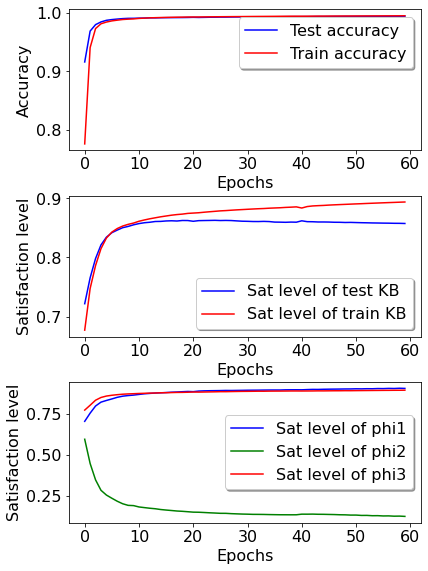

<Figure size 1500x900 with 0 Axes>

In [37]:
from pylab import rcParams
rcParams['figure.figsize'] = 6, 8

results = pd.read_csv("results_attack_type.csv", skipinitialspace = True)
fig, ax = plt.subplots(3,1)
fig.tight_layout()
figure(figsize=(10, 6), dpi=150)
ax[0].plot(results['test_accuracy'], color='b', label="Test accuracy")
ax[0].plot(results['train_accuracy'], color='r', label="Train accuracy",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(results['test_sat_kb'], color='b', label="Sat level of test KB")
ax[1].plot(results['train_sat_kb'], color='r',label="Sat level of train KB")
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Satisfaction level')

ax[2].plot(results['test_sat_phi1'], color='b', label="Sat level of phi1")
ax[2].plot(results['test_sat_phi2'], color='g',label="Sat level of phi2")
ax[2].plot(results['test_sat_phi3'], color='r',label="Sat level of phi3")
legend = ax[2].legend(loc='best', shadow=True)
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Satisfaction level')